In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('train.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

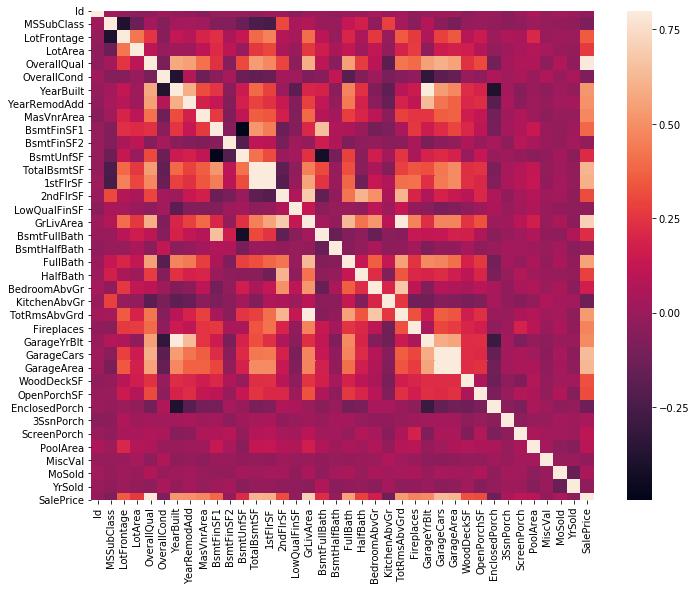

In [3]:
#correlation matrix
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

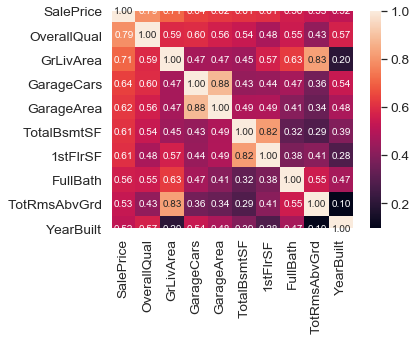

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


In [7]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
print(cols)

In [15]:
features = dataset.loc[:,{'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'}]
goal = dataset.iloc[:,-1]
features
goal

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set, goal_train, goal_test = train_test_split(features, goal, test_size =1/3, random_state = 0)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_set, goal_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
goal_predict = model.predict(test_set)
test_set

,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,GarageCars,1stFlrSF,YearBuilt,OverallQual
529,2035,2515,3,9,484,2,2515,1957,6
491,806,1578,1,5,240,1,958,1941,6
459,709,1203,1,5,352,1,979,1950,5
279,1160,2022,2,8,505,2,1156,1977,7
655,525,1092,1,6,264,1,525,1971,6
...,...,...,...,...,...,...,...,...,...
1127,1530,1530,2,7,630,3,1530,2004,7
1424,1024,1344,1,6,484,1,1344,1958,5
587,840,860,1,4,528,2,860,1982,5
1157,1314,1314,2,6,626,2,1314,2007,7


In [23]:
acurcy=model.score
acurcy

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>